In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
# gerekli csv dosyası yüklenir 
warnings.filterwarnings("ignore", category = DeprecationWarning) 
data = pd.read_csv('train.csv', encoding = 'latin-1')

In [3]:
# dataset hakkında bilgiler verilir
print("Örnek Sayısı:", len(data))
print("Değişken Sayısı:", len(data.columns))

Örnek Sayısı: 1459
Değişken Sayısı: 81


In [4]:
# datasetin min, max, quartiles gibi özellikleri bulunur
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# feature'lardaki NaN değerlerinin sayısına bakılır
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
# numerik değerlerdeki Nan olan kısımlar, o feature'a ait mean ile doldurulur
data.fillna(data.mean(), inplace = True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# kategorik değerlerdeki NaN kısımlar, datasetten çıkartılır
data = data.dropna(axis = 1)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [8]:
# görselleştirme için gereken fonksiyonlar yazılır (*Ref)
def removePlotBorder():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

def displayPlotTitle(bar_plot):
    for bari in bar_plot:
        height = bari.get_height()
        plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height() + 1, str(int(height)) + '%',
                 ha='center', color='black', fontsize=15)
        
def displayPlotTitleFloat(bar_plot,font_size):
    for bari in bar_plot:
        height = bari.get_height()
        plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height() + 0.2, str(round(float(height),2)),
                 ha='center', color='black', fontsize=font_size)
        
def rotateTitle45(x,rotate_val):
    for item in x.get_ticklabels():
        item.set_rotation(rotate_val)
        
def floatToInt(myDF,columnName):
    return myDF[columnName].astype(int)

In [9]:
mosts = data.corr()
mosts.sort_values(["SalePrice"], ascending = False, inplace = True)
print(mosts.SalePrice.head(10))

SalePrice       1.000000
OverallQual     0.790972
GrLivArea       0.708584
GarageCars      0.640383
GarageArea      0.623385
TotalBsmtSF     0.613792
1stFlrSF        0.605971
FullBath        0.560604
TotRmsAbvGrd    0.533682
YearBuilt       0.522877
Name: SalePrice, dtype: float64


In [10]:
# MSSubClass ile SalePrice arasındaki ilişki var mı diye bakılır
slPrc_MsSC = data[['Id','MSSubClass','SalePrice']]
slPrc_MsSC['MsSC_count'] = data.groupby(['MSSubClass'])['Id'].transform('count')
slPrc_mean = slPrc_MsSC.groupby(['MSSubClass'],as_index=False).mean()
slPrc_mean['SalePrice'] = list(map((lambda x: round(x,2)),slPrc_mean['SalePrice']))
slPrc_mean = slPrc_mean.sort_values(by=['SalePrice'], ascending=False)

/home/zeynasip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


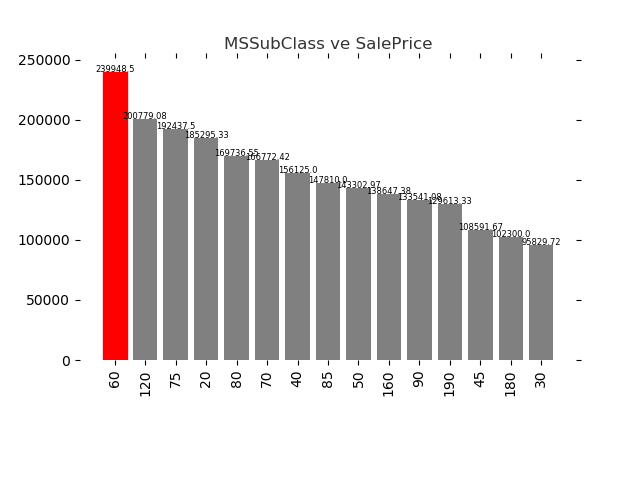

In [11]:
# MsSubClass & SalePrice grafiği çizilir
plt.figure()

priceMeanPlot = range(len(slPrc_mean['MSSubClass']))

prcMean_bar = plt.bar(priceMeanPlot, slPrc_mean['SalePrice'], width = 0.8, color = "grey")
prcMean_bar[0].set_color('red')
plt.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off', labelleft = 'off', labelbottom = 'on')    
plt.xticks(priceMeanPlot, slPrc_mean['MSSubClass'])
plt.subplots_adjust(bottom = 0.25) 

x = plt.gca().xaxis
rotateTitle45(x, 90)

removePlotBorder()
displayPlotTitleFloat(prcMean_bar, 6)

plt.title("MSSubClass ve SalePrice", alpha = 0.8)

plt.show()

<IPython.core.display.Javascript object>


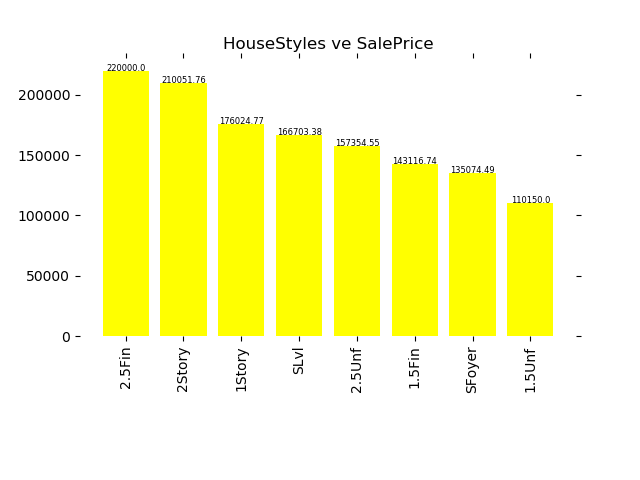

/home/zeynasip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/zeynasip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
# HouseStyle ile SalePrice arasında bağlantı var mı bakılır ve grafiği çizilir
plt.figure()

prices_styles = data[['Id','HouseStyle','SalePrice']]
styles = []
for row in prices_styles['HouseStyle']:
    styles.append(row.split('|')[0])
prices_styles['HouseStyle'] = styles

prices_styles['utils_count'] = prices_styles.groupby(['HouseStyle'])['Id'].transform('count')
prices_styles = prices_styles.groupby(['HouseStyle'],as_index=False).mean()
prices_styles = prices_styles.sort_values(by=['SalePrice'], ascending=False)

styles_range = range(len(prices_styles))

plt.subplots_adjust(bottom=0.30) 
x = plt.gca().xaxis
rotateTitle45(x,90)

price_styles_bar = plt.bar(styles_range, prices_styles['SalePrice'], width = 0.8, color = "yellow")

removePlotBorder()
displayPlotTitleFloat(price_styles_bar,6)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') 
plt.xticks(styles_range, prices_styles['HouseStyle'])
plt.title("HouseStyles ve SalePrice")
plt.show()


<IPython.core.display.Javascript object>


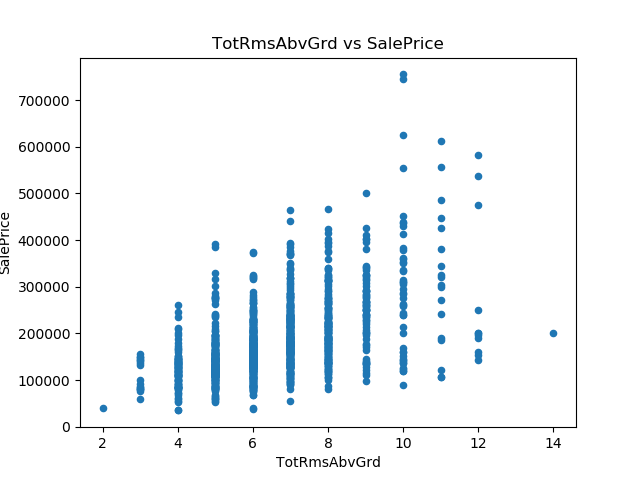

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

In [13]:
# TotRmsAbvGrd ile SalePrice arasında bağlantı var mı diye bakılır
totrms_price = data[['Id','TotRmsAbvGrd','SalePrice']]
totrms_price = totrms_price.sort_values(by = ['SalePrice'], ascending = False)

ax = totrms_price.plot(kind = 'scatter', x = 'TotRmsAbvGrd', y = 'SalePrice')
ax.set_xlabel("TotRmsAbvGrd")
ax.set_ylabel("SalePrice")
plt.title("TotRmsAbvGrd vs SalePrice")

<IPython.core.display.Javascript object>


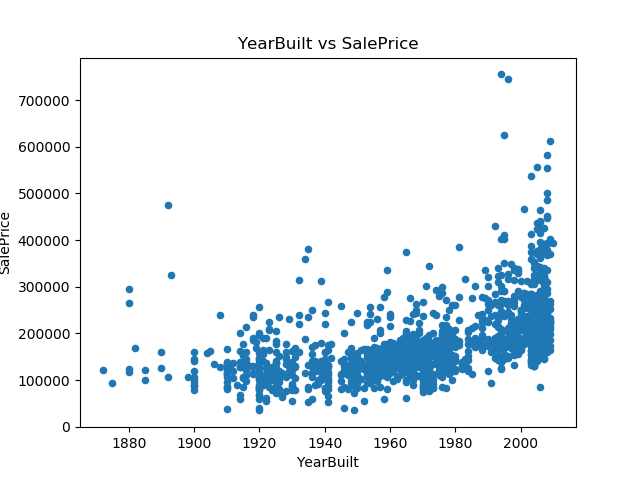

Text(0.5, 1.0, 'YearBuilt vs SalePrice')

In [14]:
# YearBuilt ve Sale Price arasında bağlantı var mı diye bakılır
year_price = data[['Id','YearBuilt','SalePrice']]
year_price = year_price.sort_values(by = ['SalePrice'], ascending = False)

ax = year_price.plot(kind = 'scatter', x = 'YearBuilt', y = 'SalePrice')
ax.set_xlabel("YearBuilt")
ax.set_ylabel("SalePrice")
plt.title("YearBuilt vs SalePrice")

<IPython.core.display.Javascript object>


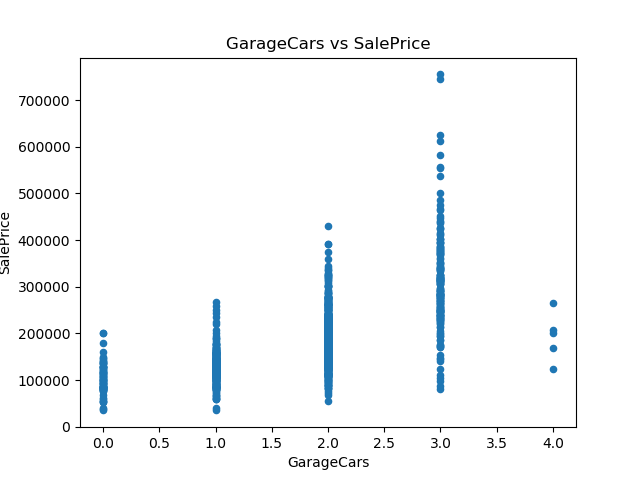

Text(0.5, 1.0, 'GarageCars vs SalePrice')

In [15]:
# GarageCars ve SalePrice arasındaki bağlantıya bakılır
cars_price = data[['Id','GarageCars','SalePrice']]
cars_price = cars_price.sort_values(by = ['SalePrice'], ascending = False)

ax = cars_price.plot(kind = 'scatter', x = 'GarageCars', y = 'SalePrice')
ax.set_xlabel("GarageCars")
ax.set_ylabel("SalePrice")
plt.title("GarageCars vs SalePrice")

<IPython.core.display.Javascript object>


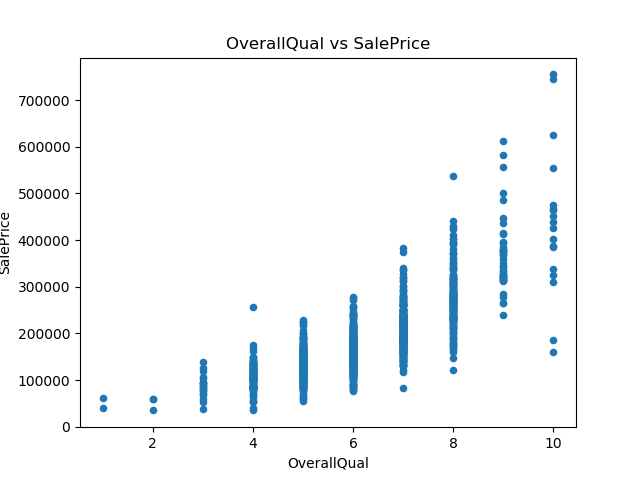

Text(0.5, 1.0, 'OverallQual vs SalePrice')

In [16]:
# OverallQual ile SalePrice arasındaki bağlantıya bakılır
overql_price = data[['Id','OverallQual','SalePrice']]
overql_price = overql_price.sort_values(by = ['SalePrice'], ascending = False)

ax = overql_price.plot(kind = 'scatter', x = 'OverallQual', y = 'SalePrice')
ax.set_xlabel("OverallQual")
ax.set_ylabel("SalePrice")
plt.title("OverallQual vs SalePrice")

In [17]:
data_test = pd.read_csv('test.csv', encoding = 'latin-1')
data_test.fillna(data_test.mean(), inplace = True)
data_test = data_test.dropna(axis = 1)

In [18]:
# İlişiği en fazla görülen 6 feature ile train ve target değerleri oluşturulur
train_columns = data[['GarageCars', 'FullBath', 'OverallQual', 'TotRmsAbvGrd', 'GarageArea', 'YearBuilt']]
target_columns = data['SalePrice']
X_train = np.array(train_columns)  
y_train = np.array(target_columns)

In [20]:
test_columns = data_test[['GarageCars', 'FullBath', 'OverallQual', 'TotRmsAbvGrd', 'GarageArea', 'YearBuilt']]
X_test = np.array(test_columns)

In [21]:
# KNeighborsClassifier ile sınıflandırmaya bakılır ve burada score çok düşüktür
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test,y_train)

0.004797806716929404

In [22]:
# NaiveBayes metodu olarak Gaussian kullanılır ancak accuracy daha da kötü sonuçlanır
clf1 = GaussianNB()
clf1.fit(X_train, y_train) 
clf1.score(X_test,y_train)

0.003427004797806717

In [23]:
# Accuracy yükseltmek için LinearRegression algoritması kullanılır ve burada accuracy değerinin daha yüksek
# olduğu gözümüze çarpar
clf2 = LinearRegression()
clf2.fit(X_train, y_train) 
clf2.score(X_test,y_train)

-0.7042892890015455

In [24]:
y_pred = clf2.predict(X_test)

In [26]:
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (i, y_pred[i]))

X=0, Predicted=140828.6162291309
X=1, Predicted=153360.44717804005
X=2, Predicted=152981.09328813618
X=3, Predicted=192370.08158722462
X=4, Predicted=229780.37225165195
X=5, Predicted=189205.97813399322
X=6, Predicted=176885.9850425336
X=7, Predicted=187466.69848972536
X=8, Predicted=196481.6705097357
X=9, Predicted=94560.87577125872
X=10, Predicted=202747.18118078797
X=11, Predicted=142767.75015926594
X=12, Predicted=128022.7303521256
X=13, Predicted=173897.02989758446
X=14, Predicted=164883.75552652322
X=15, Predicted=337162.09672668204
X=16, Predicted=283118.98241248867
X=17, Predicted=302434.9102601955
X=18, Predicted=280812.41805656254
X=19, Predicted=348839.48547491257
X=20, Predicted=274231.61658023787
X=21, Predicted=242685.39832541044
X=22, Predicted=180782.39362314378
X=23, Predicted=210585.6594203472
X=24, Predicted=218523.65874113457
X=25, Predicted=220625.10864006286
X=26, Predicted=286346.80281018326
X=27, Predicted=272084.5422474664
X=28, Predicted=204966.17138257285
X=2

In [27]:
pre_dict = {}
pre_dict['Id'] = data_test['Id']
pre_dict['SalePrice'] = y_pred
df = pd.DataFrame (pre_dict, columns = ['Id','SalePrice'])
df

,Id,SalePrice
0,1461,140828.616229
1,1462,153360.447178
2,1463,152981.093288
3,1464,192370.081587
4,1465,229780.372252
...,...,...
1454,2915,63059.398438
1455,2916,96500.096456
1456,2917,156794.891572
1457,2918,108478.067044


In [28]:
df.to_csv('predicted_datas.csv', index = False)

In [29]:
# Modeli geliştirmek için SelectFromModel ile feature selection yapılır ve Cross Validation kullanılır
# Ancak buradada görüldüğü üzere accuracy artmaz ve hatta düşer
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(clf2, threshold=0.25).fit(X, y)
X_new = sfm.transform(X)
scoresAcc= cross_val_score(clf2, X_new, y, cv=5)

print('Cross Validation Accuracy Mean: %.2f' %scoresAcc.mean())

NameError: name 'X' is not defined

In [113]:
# SelectFromModel selcetiondan alınamayan verim bu sefer SelectKBest ve f_regression metotlarıyla denenir
# Ancak bundan da beklenen sonuç elde edilemez
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

feat_extractor = SelectKBest(f_regression, k = 5)
X_new = feat_extractor.fit_transform(X_train, y_train)
scoresAcc= cross_val_score(clf2, X_new, y_train, cv = 10)

print('Cross Validation Accuracy Mean:%.2f' %scoresAcc.mean())

Cross Validation Accuracy Mean:0.71


In [114]:
# Son olarak SelectKBest ve chi2 teknikleri, Lasso algoritması ile denenir 
from sklearn.feature_selection import chi2

feat_extractor = SelectKBest(chi2, k = 5)
X_new = feat_extractor.fit_transform(X_train, y_train)

scoresAcc= cross_val_score(clf2, X_new, y_train, cv = 10)

print('Cross Validation Accuracy Mean:%.2f' %scoresAcc.mean())

Cross Validation Accuracy Mean:0.72
